In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_excel('./Data/satisfaction.xlsx')

In [3]:
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
df.columns = ['ID', 'Satisfaction', 'Gender', 'Customer_type', 'Age',
       'Type_of_travel', 'Class', 'Flight_distance', 'Seat_comfort',
       'Departure_arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_online_booking', 'Onboard_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_delay_in_minutes', 'Arrival_delay_in_minutes']

In [6]:
df['Satisfaction'] = df['Satisfaction'].apply(lambda value: 1 
if value == 'satisfied' else 0)

In [7]:
df['Gender'] = df['Gender'].apply(lambda value: 1 
if value == 'Female' else 0)

In [8]:
df['Customer_type'] = df['Customer_type'].apply(lambda value: 1 
if value == 'Loyal Customer' else 0)

In [9]:
df['Type_of_travel'] = df['Type_of_travel'].apply(lambda value: 1 
if value == 'Business travel' else 0)

In [10]:
df['Class'] = df['Class'].apply(lambda value: 0 
if value == 'Eco' else 1
if value == 'Eco Plus' else 2)

In [11]:
df.dtypes

ID                                     int64
Satisfaction                           int64
Gender                                 int64
Customer_type                          int64
Age                                    int64
Type_of_travel                         int64
Class                                  int64
Flight_distance                        int64
Seat_comfort                           int64
Departure_arrival_time_convenient      int64
Food_and_drink                         int64
Gate_location                          int64
Inflight_wifi_service                  int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_online_booking                 int64
Onboard_service                        int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Departure_

In [12]:
df = df.drop(['ID'], axis = 1)

In [13]:
df

,Satisfaction,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Seat_comfort,Departure_arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_delay_in_minutes,Arrival_delay_in_minutes
0,1,1,1,65,0,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,1,47,0,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,1,15,0,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,1,60,0,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,1,70,0,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,0,29,0,0,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,0,0,63,0,2,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,0,0,69,0,0,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,0,0,66,0,0,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [14]:
df[df.Arrival_delay_in_minutes.isna() == True]

,Satisfaction,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Seat_comfort,Departure_arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_delay_in_minutes,Arrival_delay_in_minutes
145,1,1,1,21,0,0,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,1,0,1,28,0,0,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,1,0,1,28,0,0,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,1,0,1,9,0,0,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,0,0,1,9,0,0,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,1,0,1,44,1,2,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,1,0,1,39,1,2,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,1,1,1,45,1,0,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,1,0,0,49,0,0,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


In [16]:
df.Arrival_delay_in_minutes = df.Arrival_delay_in_minutes.fillna(df.Arrival_delay_in_minutes.mean())

In [17]:
X = df.iloc[:,1:]
y = np.array(df['Satisfaction'])

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [18]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Logistic Regression is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

0.8377733292269788

In [20]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.6726423906736732

In [22]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Decision Tree is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

0.9415999384046813

In [23]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.8821902425747334

In [ ]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=300)
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()

In [36]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

0.928279950723745

In [37]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.855927886883942

In [47]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=1500, criterion = 'entropy', random_state = 6).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
rf = accuracy_score(y_test, model_rf_prediction)
print('Accuracy Score: ', rf)



Accuracy Score:  0.9604635047736372


In [48]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
print('Kappa: ', kappa_rf)

Kappa:  0.9204181480860991


In [ ]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1500).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, model_rf_prediction)

conf_rf = confusion_matrix(y_test, model_rf_prediction)
clf_report_rf = classification_report(y_test, model_rf_prediction)

print(f"Accuracy Score of Random Forest is : {accuracy_rf}")
print(f"Confusion Matrix : \n{conf_rf}")
print(f"Classification Report : \n{clf_report_rf}")

In [ ]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

In [ ]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

In [ ]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

In [ ]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

In [ ]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

In [ ]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

In [ ]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

In [ ]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

In [ ]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

In [ ]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

In [ ]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

In [ ]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

In [ ]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

In [ ]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

In [ ]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

In [ ]:
# Models Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier', 'K-Fold Decision Tree'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, 
              accuracy_etc, accuracy_lgbm, accuracy_vc, model_kfdt.mean()],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc, model_kfdt.mean()]
})


models.sort_values(by = 'Kappa', ascending = False)

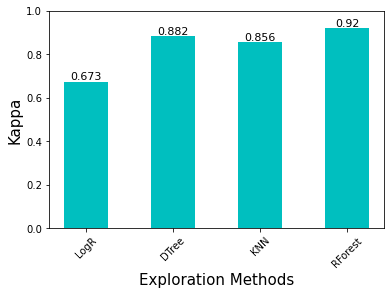

In [42]:
# PLOT: All Kappa values as comparison

kappa_overview = pd.Series([kappa_lr, kappa_dt, kappa_knn, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, kappa_vc])
# kappa_overview = pd.Series(kappa_overview)

exploration_methods = ['LogR', 'DTree', 'KNN', 'RForest', 'Ada', 'GBoost', 'XgBoost', 'Cat', 'ETC', 'LGBM', 'VC', 'K-F_DT'] 

plt.bar(x=exploration_methods, height = kappa_overview, color = 'c', width = 0.5)
#plt.grid()
plt.title('Efficiency of Machine Learning in Prediction of Airline Passenger`s Satisfaction')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('Kappa', fontsize=15)
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i in range(len(kappa_overview)):
  plt.text(
      x = i, 
      y = kappa_overview[i], 
      s = round(kappa_overview[i], 3), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()